In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [3]:
df_train = pd.read_csv('../train.csv',header = 0)

In [9]:
df_train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40,1,5,1


In [31]:
df_train['windspeed']

0         0.0000
1         0.0000
2         0.0000
3         0.0000
4         0.0000
5         6.0032
6         0.0000
7         0.0000
8         0.0000
9         0.0000
10       16.9979
11       19.0012
12       19.0012
13       19.9995
14       19.0012
15       19.9995
16       19.9995
17       19.0012
18       16.9979
19       16.9979
20       16.9979
21       12.9980
22       15.0013
23       19.9995
24       19.9995
25       16.9979
26       19.0012
27       12.9980
28       12.9980
29       19.9995
          ...   
10856    22.0028
10857    26.0027
10858    16.9979
10859    15.0013
10860     0.0000
10861     6.0032
10862     0.0000
10863     6.0032
10864     6.0032
10865     8.9981
10866     8.9981
10867     6.0032
10868     6.0032
10869     8.9981
10870     7.0015
10871     7.0015
10872     7.0015
10873    15.0013
10874    19.0012
10875    12.9980
10876    12.9980
10877    19.0012
10878    23.9994
10879    26.0027
10880    23.9994
10881    26.0027
10882    15.0013
10883    15.00

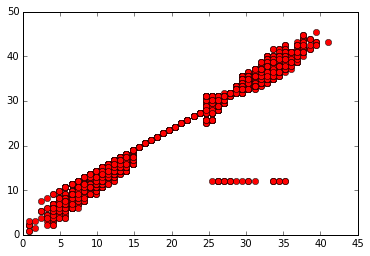

In [16]:
plt.plot(df_train['temp'],df_train['atemp'],'ro')
plt.show()

In [22]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_train['temp'],df_train['atemp'])

In [20]:
print r_value**2

0.970122780341


In [32]:
mls = pd.DataFrame({'x': df_train['temp'],'y': df_train['humidity'],'a': df_train['windspeed'],'z' : df_train['atemp']})
model = ols("z ~ x + y + a", mls).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 1.249e+05
Date:                Fri, 28 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:05:34   Log-Likelihood:                -19291.
No. Observations:               10886   AIC:                         3.859e+04
Df Residuals:                   10882   BIC:                         3.862e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.2438      0.071     31.424      0.0

In [37]:
anova_results = anova_lm(model)
print(anova_results)


             df         sum_sq        mean_sq              F         PR(>F)
x             1  758391.781110  758391.781110  374097.561502   0.000000e+00
y             1     327.847316     327.847316     161.719687   8.699755e-37
a             1     968.009513     968.009513     477.497261  1.241925e-103
Residual  10882   22060.607209       2.027257            NaN            NaN


In [8]:
df_train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [9]:
df_train.shape

(10886, 12)

In [6]:
df_train['month'] = pd.DatetimeIndex(df_train.datetime).month
df_train['day'] = pd.DatetimeIndex(df_train.datetime).dayofweek
df_train['hour'] = pd.DatetimeIndex(df_train.datetime).hour

In [14]:
df_train = df_train.drop(['datetime','casual','registered'], axis = 1)

In [16]:
df_train_target = df_train['count'].values
df_train_data = df_train.drop(['count'],axis = 1).values

In [17]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import explained_variance_score

In [18]:
cv = cross_validation.ShuffleSplit(len(df_train_data), n_iter=3, test_size=0.2,
    random_state=0)

print "SVR(kernel='rbf',C=10,gamma=.001)"
for train, test in cv:
    
    svc = svm.SVR(kernel ='rbf', C = 10, gamma = .001).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))

print "Ridge"    
for train, test in cv:    
    svc = linear_model.Ridge().fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))
    
print "Random Forest(n_estimators = 100)"    
for train, test in cv:    
    svc = RandomForestRegressor(n_estimators = 100).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))

SVR(kernel='rbf',C=10,gamma=.001)
train score: 0.417, test score: 0.408

train score: 0.406, test score: 0.452

train score: 0.419, test score: 0.390

Ridge
train score: 0.339, test score: 0.332

train score: 0.330, test score: 0.370

train score: 0.342, test score: 0.320

Random Forest(n_estimators = 100)
train score: 0.982, test score: 0.865

train score: 0.981, test score: 0.880

train score: 0.981, test score: 0.869



In [19]:
X = df_train_data
y = df_train_target

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=0)

tuned_parameters = [{'n_estimators':[10,100,500]}]   
    
scores = ['r2']

for score in scores:
    
    print score
    
    clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print ""
    #best_estimator_ returns the best estimator chosen by the search
    print(clf.best_estimator_)
    print ""
    print("Grid scores on development set:")
    print ""
    #grid_scores_ returns:
    #    * a dict of parameter settings
    #    * the mean score over the cross-validation folds 
    #    * the list of scores for each fold
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print ""

r2
Best parameters set found on development set:

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

Grid scores on development set:

0.848 (+/-0.005) for {'n_estimators': 10}
0.862 (+/-0.005) for {'n_estimators': 100}
0.863 (+/-0.005) for {'n_estimators': 500}



/usr/local/bin/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


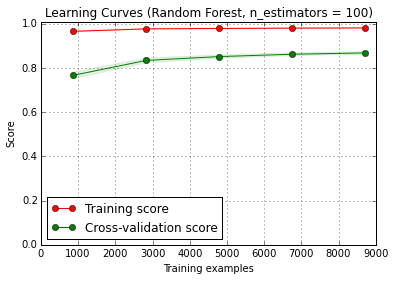

In [20]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (Random Forest, n_estimators = 100)"
cv = cross_validation.ShuffleSplit(df_train_data.shape[0], n_iter=10,test_size=0.2, random_state=0)
estimator = RandomForestRegressor(n_estimators = 100)
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()